# Steepest Descent

Source: Saupin (2023) p.84

Searching for the min and max of $p(x) = (x-1)(x-3)(x-5)$ by using the *steepest descent* method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0, 5, 100)
p = lambda x: (x - 1 ) * (x - 3) * (x - 5)
grad_p = lambda x : 3*x**2 - 18*x + 23
Y = [p(x) for x in X]

In [3]:
def gradient_descent(f, grad, x_0, delta=1e-3, threshold=1e-3, max_iter=1e3, sign=1):
    x = x_0
    f_x = f(x)
    move = 1
    n_iter = 0
    while abs(move) > threshold and n_iter < max_iter:
        x = x - grad(x) * delta * sign
        move = f_x - f(x)
        n_iter += 1

    return x

In [4]:
def maximize(f, grad, x_0, delta=1e-3, threshold=1e-3, max_iter=1e3):
    return gradient_descent(f, grad, x_0, delta, threshold, max_iter, -1)

In [5]:
def minimize(f, grad, x_0, delta=1e-3, threshold=1e-3, max_iter=1e3):
    return gradient_descent(f, grad, x_0, delta, threshold, max_iter)

In [6]:
x_start_min = 3.3
min_x = minimize(p, grad_p, x_start_min)
print(min_x)
#> 4.153399348211452 à comparer à 4.1547005383792515
x_start_max = 2.9
max_x = maximize(p, grad_p, x_start_max)
print(max_x)
#> 1.849078651186161 à comparer à 1.8452994616207485

4.153399348211452
1.8471625372409248


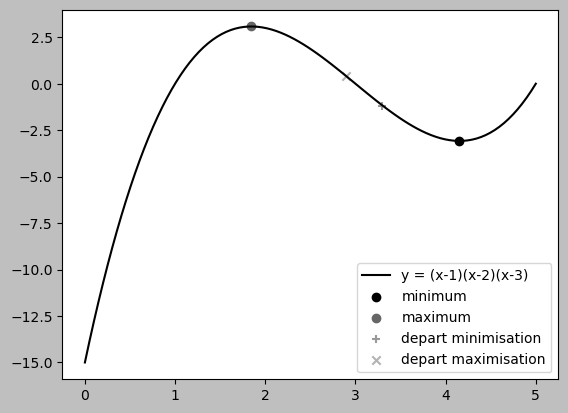

In [7]:
plt.style.use('grayscale')
plt.plot(X, Y, label="y = (x-1)(x-2)(x-3)")
plt.scatter(min_x, p(min_x), label="minimum")
plt.scatter(max_x, p(max_x), label="maximum")
plt.scatter(x_start_min, p(x_start_min), marker='+', label="depart minimisation")
plt.scatter(x_start_max, p(x_start_max), marker='x', label="depart maximisation")
plt.legend()
plt.show()